# Starter EDA - NYC Daily Inmates

Make the necessary library imports

In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

### Read data & get a gist of the kind of data

In [123]:
data = pd.read_csv("data/daily-inmates-in-custody.csv")
data.sample(5)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
5421,9990,2018-03-01T01:22:39,NaN,MED,Y,O,M,38.0,DPV,N,N,NaN,Y
3138,20139432,2018-04-27T11:45:00,NaN,MAX,Y,B,M,45.0,DEP,N,N,120.05,N
471,20069742,2016-10-04T01:18:43,NaN,MIN,N,O,M,42.0,DE,N,N,220.21,Y
6845,20195328,2018-05-28T01:24:52,NaN,MIN,Y,W,M,66.0,CSP,N,N,240.30,N
5412,20195533,2018-06-04T00:49:20,NaN,MIN,N,B,M,25.0,DE,N,N,160.10,N


---

### Preliminary Inferences

1. Data is largely categorical nature with only two features - **Age** & **Top Charge** being numeric.

2. **DISCHARGED_DT** has no entries & therefore can safely be ignored

3. Points of interests can be - **Gender** & **Race** around which basic visualizations can be centered

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8303 entries, 0 to 8302
Data columns (total 13 columns):
INMATEID              8303 non-null int64
ADMITTED_DT           8303 non-null object
DISCHARGED_DT         0 non-null float64
CUSTODY_LEVEL         8116 non-null object
BRADH                 8303 non-null object
RACE                  8284 non-null object
GENDER                8284 non-null object
AGE                   8292 non-null float64
INMATE_STATUS_CODE    8303 non-null object
SEALED                8303 non-null object
SRG_FLG               8303 non-null object
TOP_CHARGE            7261 non-null object
INFRACTION            8303 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 843.4+ KB


---

### Let us begin by plotting a distribution of Ages

This is quite expected as most of detainees have ages in the range of 20-40 years.

Text(0,0.5,'Count')

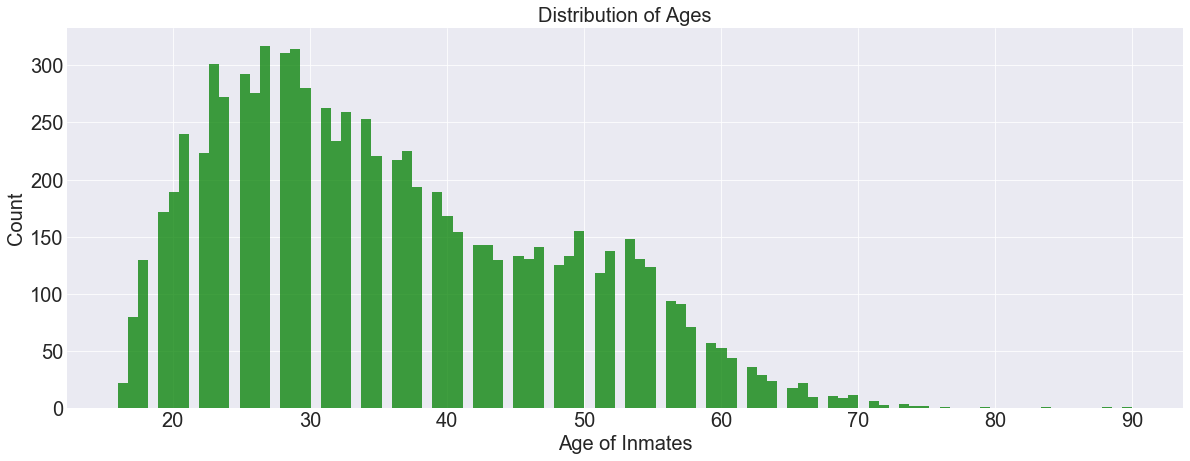

In [125]:
plt.figure(figsize=(20,7))
h = plt.hist(pd.to_numeric(data.AGE).dropna(), facecolor='g', alpha=0.75, bins=100)
plt.title("Distribution of Ages")
plt.xlabel("Age of Inmates")
plt.ylabel("Count")

In [126]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

## Proportion of Detainees by GENDER & RACE

Text(0.5,1,'RACE')

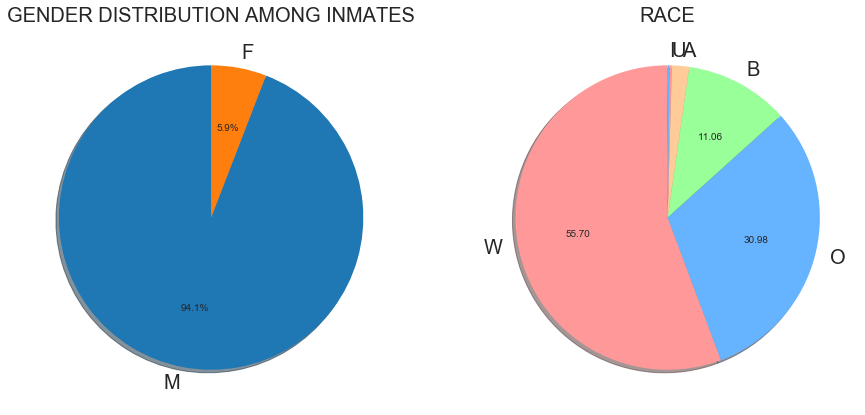

In [127]:
f, ax = plt.subplots(1,2, figsize=(15,7))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['GENDER'].value_counts()), 
                   labels=list(data.GENDER.unique())[1:],
                  autopct='%1.1f%%', shadow=True, startangle=90)
pie = ax[1].pie(list(data['RACE'].value_counts()), 
                   labels=list(data.RACE.unique())[1:],
                  autopct=my_autopct, shadow=True, startangle=90, colors=colors)
ax[0].set_title("GENDER DISTRIBUTION AMONG INMATES")
ax[1].set_title("RACE")
#ax[1][1].set_title("RACE - GENDER DISTRIBUTION")

### Individual proportions of RACE across the two GENDERS

Text(0,0.5,'Number of Inmates')

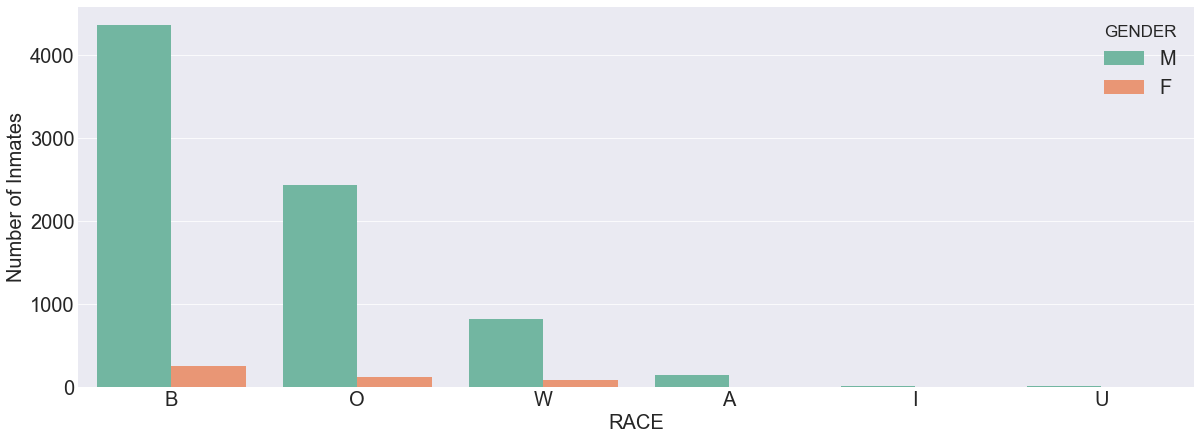

In [133]:
plt.figure(figsize=(20,7))
sns.countplot(x='RACE', hue='GENDER', data=data, palette="Set2",
             order = data['RACE'].value_counts().index)
plt.ylabel("Number of Inmates")

Text(0,0.5,'Number of Inmates')

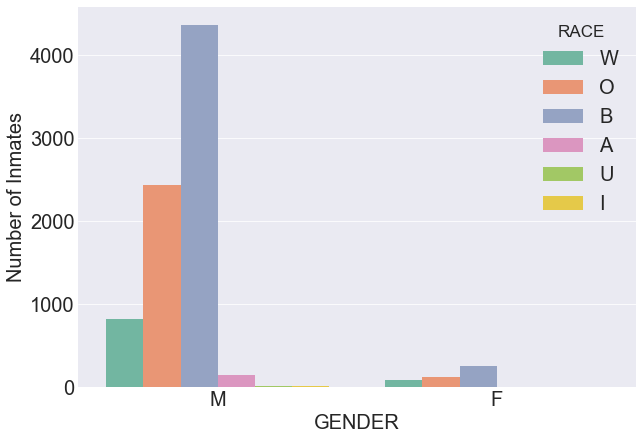

In [134]:
plt.figure(figsize=(10,7))
sns.countplot(x='GENDER', hue='RACE', data=data, palette="Set2",
             order = data['GENDER'].value_counts().index)
plt.ylabel("Number of Inmates")

## Under Mental Observation

A significant proportion of inmates are under Mental Observation (> 40%)

Text(0.5,0,'Inmates under Mental Observation? Y-Yes, N-No')

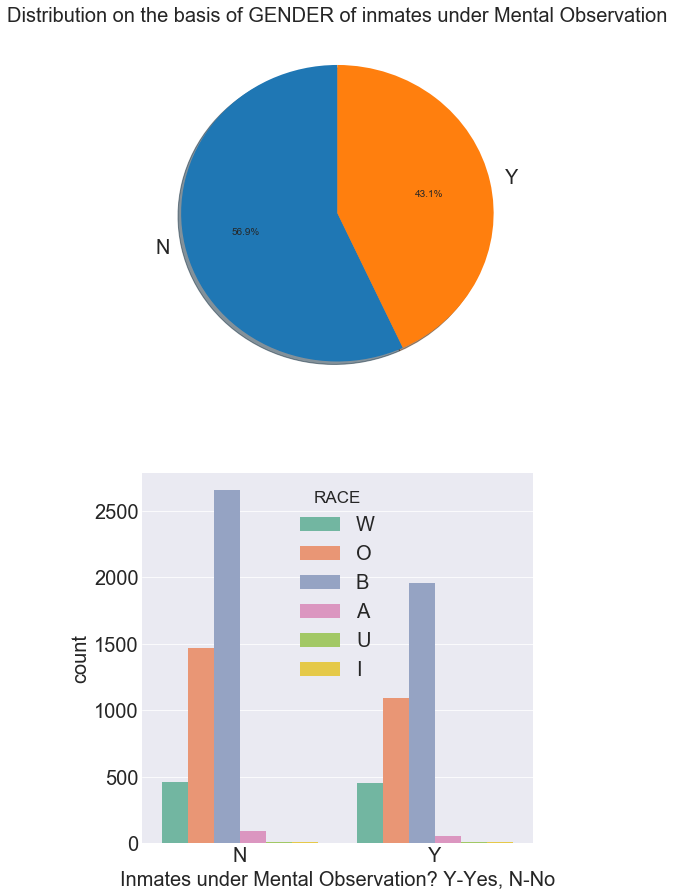

In [135]:
f, ax = plt.subplots(2,1, figsize=(7,15))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['BRADH'].value_counts()), 
                   labels=list(data.BRADH.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90)
sns.countplot(x='BRADH', hue='RACE', data=data, palette="Set2",
             order = data['BRADH'].value_counts().index, ax=ax[1])
ax[0].set_title("Distribution on the basis of GENDER of inmates under Mental Observation")
ax[1].set_xlabel("Inmates under Mental Observation? Y-Yes, N-No")
#ax[1].set_title("RACE")

Text(0.5,1,'Member of the Gang?')

<Figure size 504x504 with 0 Axes>

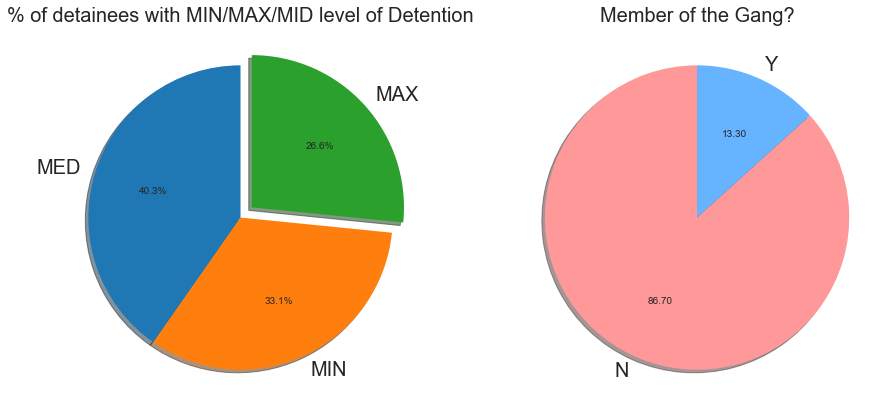

In [131]:
plt.figure(figsize=(7,7))
explode = (0,0,0.1)
f, ax = plt.subplots(1,2, figsize=(15,7))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['CUSTODY_LEVEL'].value_counts()), 
                   labels=list(data.CUSTODY_LEVEL.unique())[1:],
                  autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
pie = ax[1].pie(list(data.SRG_FLG.value_counts()), 
                   labels=list(data.SRG_FLG.unique()),
                  autopct=my_autopct, shadow=True, startangle=90, colors=colors)
ax[0].set_title("% of detainees with MIN/MAX/MID level of Detention")
ax[1].set_title("Member of the Gang?")

## Gang Affiliations

Text(0.5,0,'Gang Affiliations? Y-Yes, N-No')

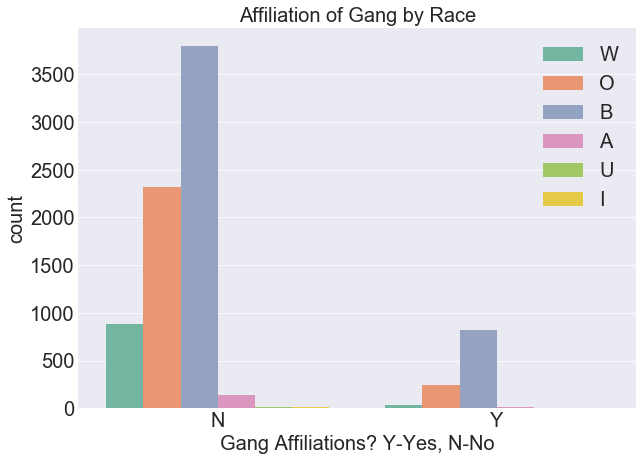

In [132]:
plt.figure(figsize=(10,7))
sns.countplot(x='SRG_FLG', hue='RACE', data=data, palette="Set2",
             order = data['SRG_FLG'].value_counts().index)
plt.legend(loc="upper right")
plt.title("Affiliation of Gang by Race")
plt.xlabel("Gang Affiliations? Y-Yes, N-No")